# **Hill and valley prediction using logistic regression**

-------------

## **Get understanding about dataset**

Each record represent 100 points on a two dimensional graph. when plotted in order (from 1 to 100) as the y coordinate , the points will create either a hill (a "bump in the terrain") or a valley (a "dip in the terrain") seee the original source for some example of these graphs

1-100: Labeled V##. Floating point values (numeric) the X-values

101: Labeled "class". Binary {0,1} representing {valley,hill}

## **Import Library**

In [1]:
import pandas as pd

C:\Users\91992\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import numpy as np

## **Import Data**

In [3]:
df=pd.read_csv("Hill Valley Dataset.csv")

# Get the first five rows of dataframe

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


#  Get information of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


## **Describe Data**

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


#  Get column names

In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [9]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


# Get shape fo dataframe

In [10]:
df.shape

(1212, 101)

# Get unique values (class or label) in y variable

In [12]:
df['Class'].value_counts()

Class
0    606
1    606
Name: count, dtype: int64

In [13]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


# Define y (dependent or label or target) and X (independent or feature or attribute)

In [14]:
y = df['Class']

In [15]:
y.shape

(1212,)

In [16]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

In [19]:
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']]

In [20]:
X.shape

(1212, 100)

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


## **Data Visualization**

get plot of first two rows

In [25]:
import matplotlib.pyplot as plt

(array([30., 32., 34., 36., 38., 40., 42.]),
 [Text(0, 30.0, '30'),
  Text(0, 32.0, '32'),
  Text(0, 34.0, '34'),
  Text(0, 36.0, '36'),
  Text(0, 38.0, '38'),
  Text(0, 40.0, '40'),
  Text(0, 42.0, '42')])

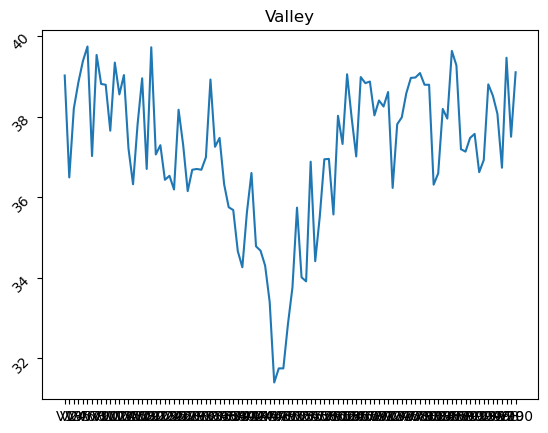

In [29]:
plt.plot(X.iloc[0,:])
plt.title('Valley')
#plt.yticks(rotation=45)


Text(0.5, 1.0, 'Hill')

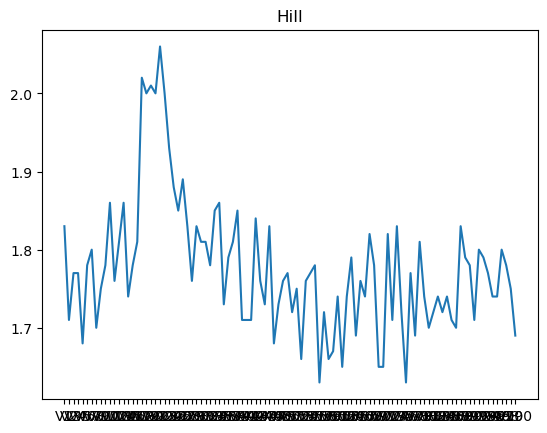

In [30]:
plt.plot(X.iloc[1,:])
plt.title("Hill")

# Get X variables standardized

Standardization of dataset is a common requirement for many machine learning estimators implemeted  in skikit learn they might behave badly if the idividual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance 


Next approach is go for MinMax Scaler

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()

In [35]:
X = ss.fit_transform(X)

In [36]:
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [38]:
X.shape

(1212, 100)

## **Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify = y,random_state = 2529)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

## **Get model train**

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(X_train,y_train)

LogisticRegression()

## Get model prediction

In [50]:
y_pred = lr.predict(X_test)

In [52]:
y_pred.shape

(364,)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

## Get probability of each Predicted class

In [57]:
lr.predict_proba(X_test)

array([[0.56336747, 0.43663253],
       [0.50327044, 0.49672956],
       [0.57446525, 0.42553475],
       [0.50737531, 0.49262469],
       [0.50767484, 0.49232516],
       [0.50870666, 0.49129334],
       [0.50793223, 0.49206777],
       [0.60357933, 0.39642067],
       [0.51009661, 0.48990339],
       [0.50964842, 0.49035158],
       [0.50721218, 0.49278782],
       [0.51503424, 0.48496576],
       [0.93595848, 0.06404152],
       [0.50968828, 0.49031172],
       [0.52004965, 0.47995035],
       [0.73731215, 0.26268785],
       [0.47389175, 0.52610825],
       [0.50781853, 0.49218147],
       [0.50862151, 0.49137849],
       [0.50863426, 0.49136574],
       [0.2977193 , 0.7022807 ],
       [0.38273294, 0.61726706],
       [0.50865402, 0.49134598],
       [0.28367983, 0.71632017],
       [0.50873188, 0.49126812],
       [0.50707767, 0.49292233],
       [0.50896142, 0.49103858],
       [0.50811703, 0.49188297],
       [0.50861564, 0.49138436],
       [0.50748426, 0.49251574],
       [0.

# Get model evaluation

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
print(confusion_matrix(y_test, y_pred))

[[181   1]
 [106  76]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



## Get Future Predictions

Lets select a random  sample from existing dataset as new value

Steps to follow

1.Extract a random row using sample function

2.Seperate X and y

3.Standardize X

4.Predict


In [62]:
X_new = df.sample(1)

In [63]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
440,1068.7,1042.32,1260.73,1213.35,1078.48,1184.97,1095.21,1278.28,1020.5,1212.83,...,1104.99,1027.1,1020.64,1195.33,1101.46,1060.54,1127.53,1100.55,1258.75,1


In [64]:
X_new.shape

(1, 101)

In [65]:
X_new = X_new.drop('Class',axis=1)

In [66]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
440,1068.7,1042.32,1260.73,1213.35,1078.48,1184.97,1095.21,1278.28,1020.5,1212.83,...,1199.01,1104.99,1027.1,1020.64,1195.33,1101.46,1060.54,1127.53,1100.55,1258.75


In [67]:
X_new = ss.fit_transform(X_new)

In [68]:
y_pred_new = lr.predict(X_new)

In [69]:
y_pred_new

array([1], dtype=int64)

In [70]:
lr.predict_proba(X_new)

array([[0.49714997, 0.50285003]])

## Explanation

Understanding the Dataset
Each record in the dataset represents 100 data points (features) as floating-point values labeled from V1 to V100. These points, when plotted in sequence, create patterns that resemble either a hill or a valley:

Hill (class = 1): The pattern shows a "bump" or increase in values.
Valley (class = 0): The pattern shows a "dip" or decrease in values.
The target column, Class, is a binary variable where:

0 represents a valley.
1 represents a hill.
Step 1: Importing Necessary Libraries
First, import the libraries you'll need, including pandas for data handling and numpy for numerical operations:

Step 2: Loading the Dataset
Load the dataset and inspect its structure:

Step 3: Basic Dataset Information
To understand the data types, check for null values and verify the dimensions:
df.info() provides data types and any missing values.
df.describe() gives summary statistics for each feature.
df['Class'].value_counts() ensures we have a balanced target variable.

Step 4: Define Target (y) and Features (X)
Separate the features (V1 to V100) and the target variable (Class):

Step 5: Splitting Data for Training and Testing
Split the data into training and testing sets to evaluate model performance:

Step 6: Applying Logistic Regression
Use logistic regression to train the model on the training data:

Step 7: Model Prediction and Evaluation
Predict on the test set and evaluate the model’s accuracy and confusion matrix:
The accuracy_score provides the model's accuracy, while the confusion matrix helps assess performance on each class.

Summary of Key Insights
Balanced Classes: The dataset has an equal distribution of hill and valley classes, which is beneficial for binary classification.
Data Characteristics: Each record represents a series of 100 points, which allows the logistic regression model to detect patterns that classify the terrain type.
Evaluation Metrics: Accuracy and confusion matrix give insight into the model's predictive quality.
This workflow should help you predict hill or valley patterns using logistic regression effectively. Let me know if you'd like further assistance with tuning or extending the analysis!